##### Importing the data

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('file.txt')
# the data set is a txt file, not a csv.

# the data contains several documents with it's respective class

In [4]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [6]:
df.shape
#shows that the data consists of 5485 explamples with a single coloumn

(5485, 1)

##### Converting the data to desirable format

In [5]:
# here, the first interger in each row is the respective doumenents class, so lets
# first seperate it into another coloumn

In [7]:
list_1=[]
for i in df['5485']:
    list_1.append(int(i[0]))

In [8]:
#creating a new column with lables
df['Target']=list_1

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True)

In [10]:
df

,5485,Target
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1
...,...,...
5480,1 kelly oil and gas partners kly year dec shr ...,1
5481,8 japan seeks to strengthen paris currency acc...,8
5482,1 tcw convertible securities cvt sets dividend...,1
5483,8 south korean won fixed at month high the ban...,8


In [12]:
# so now we have 2 coloumns, one with the document, and another with it's respective class

# but we still have the interger in the text coloumn, lets remove it

In [13]:
df['5485']=df['5485'].str[1:]

In [14]:
df

,5485,Target
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1
...,...,...
5480,kelly oil and gas partners kly year dec shr c...,1
5481,japan seeks to strengthen paris currency acco...,8
5482,tcw convertible securities cvt sets dividend ...,1
5483,south korean won fixed at month high the bank...,8


In [15]:
# now we just have pure text in one coloumn and its respective class in another coloumn

##### Data Visualization

In [16]:
#renaming the coloumn name, so it makes sense
df=df.rename({'5485':'Text'},axis=1)

In [17]:
df.isnull().sum()
#checking if any null values are present...

Text      0
Target    0
dtype: int64

In [26]:
df

,Text,Target
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1
...,...,...
5480,kelly oil and gas partners kly year dec shr c...,1
5481,japan seeks to strengthen paris currency acco...,8
5482,tcw convertible securities cvt sets dividend ...,1
5483,south korean won fixed at month high the bank...,8


In [58]:
df.describe
# gives an overall view of the data

<bound method NDFrame.describe of                                                    Text  Target
0      champion products ch approves stock split cha...       1
1      computer terminal systems cpml completes sale...       2
2      cobanco inc cbco year net shr cts vs dlrs net...       1
3      am international inc am nd qtr jan oper shr l...       1
4      brown forman inc bfd th qtr net shr one dlr v...       1
...                                                 ...     ...
5480   kelly oil and gas partners kly year dec shr c...       1
5481   japan seeks to strengthen paris currency acco...       8
5482   tcw convertible securities cvt sets dividend ...       1
5483   south korean won fixed at month high the bank...       8
5484   australian unions launch new south wales stri...       4

[5485 rows x 2 columns]>

In [89]:
df.Target.unique()
# shows that there are 8 classes

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [62]:
df.Target.value_counts()
# outputs how many classes of documents are present 

1    2840
2    1596
6     253
3     251
8     206
7     190
4     108
5      41
Name: Target, dtype: int64

In [ ]:
# so we have 8 classes of documnets. The number of examples for each class is printed above
# we have so many examples that bellong to class 1, and we have the least number of examples belonging to class 5

<AxesSubplot:>

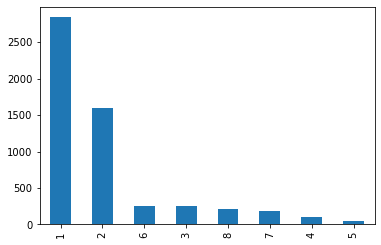

In [60]:
#plotting it on a bar graph

import matplotlib
df.Target.value_counts().plot(kind = 'bar')

##### Data_Pre-Proccesing, Feature Extraction

In [64]:
# as the input is in form of words, we need to have a slightly different apporuch

In [65]:
#The approuch is that we will count the occurence of multiple unique words in each documment and then will send this to  model.

# This would help the model, as it can now make decisions or train itself based on the occurences of certain words.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Text,df.Target,test_size = 0.25)

In [28]:
#this approach can be implemented from count_vectorization in skleanr library

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[0:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
# now this array consists of counts of each unique word in each doument 

In [37]:
# Now we have the itraining data in desired format, we can go ahead with model building

##### Model Building

In [38]:
from sklearn.naive_bayes import MultinomialNB


In [39]:
model = MultinomialNB()

#training the model with default hyperparamentes

In [40]:
model.fit(X_train_count,y_train)


MultinomialNB()

In [44]:
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9329446064139941

In [46]:
model.score(X_train_count,y_train)

0.9705810843666424

In [47]:
# so now we are gettign an accuracy of 97% on training data, and 93% on testing data

# lets see if we can improve that

In [67]:
#lets make alpha = 5
model_2 = MultinomialNB(alpha = 5,class_prior = None, fit_prior = True)

In [72]:
model_2.fit(X_train_count,y_train)


MultinomialNB(alpha=5)

In [73]:
X_test_count = v.transform(X_test)
model_2.score(X_test_count,y_test)

0.8709912536443148

In [74]:
model_2.score(X_train_count,y_train)

0.9063943593484075

In [71]:
# no imporvement

In [77]:
model_3 = MultinomialNB(alpha = 1, fit_prior = False)

In [78]:
model_3.fit(X_train_count,y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [79]:
X_test_count = v.transform(X_test)
model_3.score(X_test_count,y_test)

0.9329446064139941

In [80]:
model_3.score(X_train_count,y_train)

0.9720398735716023

In [81]:
# no impovement

In [82]:
# hence the first model gave us the best results.

In [84]:
#building confussion matrix
from sklearn.metrics import confusion_matrix

In [86]:
y_test_pred = model.predict(X_test_count)

In [93]:
conf_matrix = confusion_matrix(y_test,y_test_pred)
confusion_matrix(y_test,y_test_pred)

array([[687,  44,   0,   0,   0,   1,   0,   0],
       [  1, 388,   1,   0,   0,   0,   0,   0],
       [  1,   0,  56,   0,   0,   0,   0,   3],
       [  0,   5,   1,  19,   0,   5,   0,   1],
       [  1,   1,   9,   0,   0,   1,   0,   0],
       [  1,   4,   2,   0,   0,  45,   0,   0],
       [  1,   1,   0,   0,   0,   0,  42,   3],
       [  1,   0,   3,   0,   0,   0,   1,  43]], dtype=int64)

<AxesSubplot:>

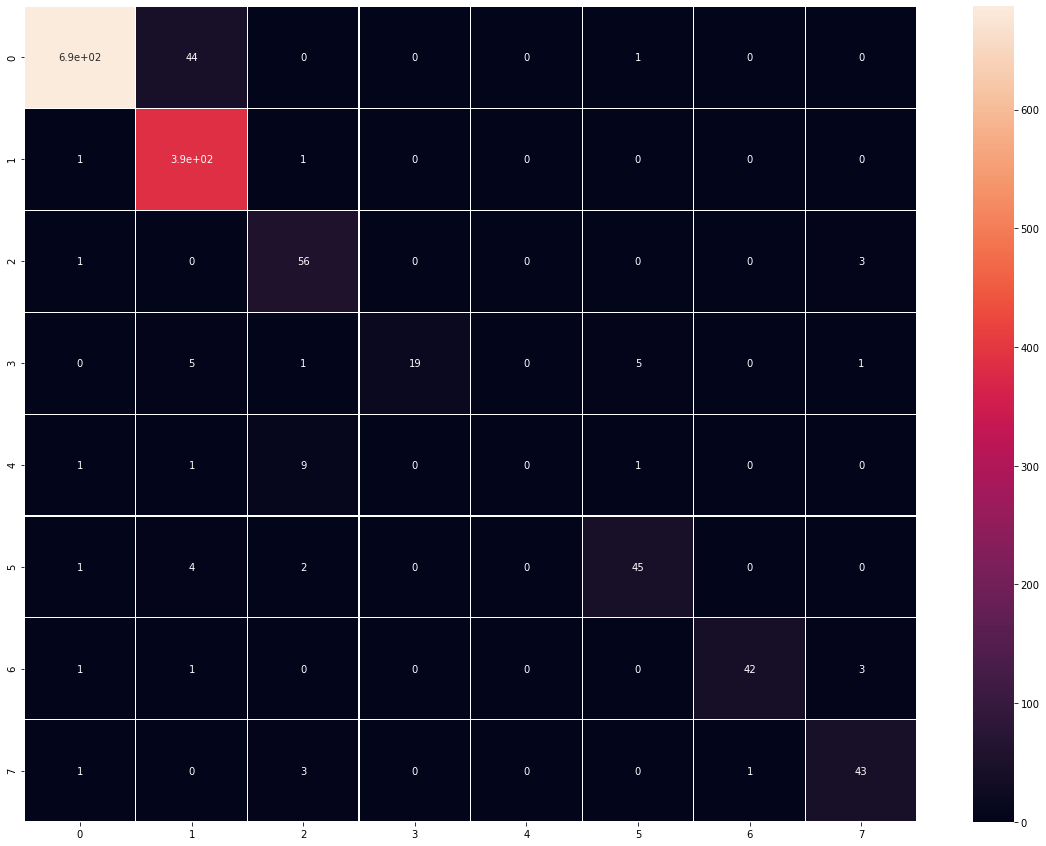

In [103]:
import seaborn as sns

matplotlib.pyplot.subplots(figsize=(20,15))
sns.heatmap(conf_matrix, annot = True, linewidths=0.1)

In [106]:
# accuracy 
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test,y_test_pred))

Accuracy score:  0.9329446064139941


In [108]:
# precision, recall, f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.99      0.94      0.96       732
           2       0.88      0.99      0.93       390
           3       0.78      0.93      0.85        60
           4       1.00      0.61      0.76        31
           5       0.00      0.00      0.00        12
           6       0.87      0.87      0.87        52
           7       0.98      0.89      0.93        47
           8       0.86      0.90      0.88        48

    accuracy                           0.93      1372
   macro avg       0.79      0.77      0.77      1372
weighted avg       0.93      0.93      0.93      1372



C:\Users\ksury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## inference

hence after performing naive bayes on documnet classification dataset, an accuracy of 93% was acieved on the testing data.

The model had less number of false positives and true negatives as well.

the hyperparamers used were, alpha = 1,class_prior = None, fit_prior = True

### result

Hence naive bayes on applied on document classification and the resulting accuracy, pression and recall, and f1 scores were printed